In [ ]:
!pip install easyocr
!pip install imutils

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

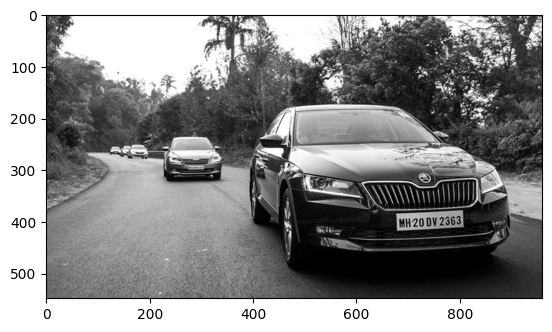

In [2]:
img = cv2.imread('Vehicle.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

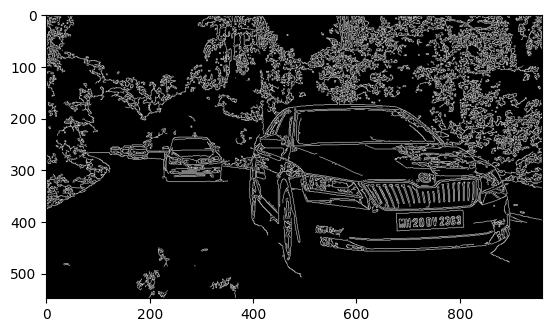

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[807, 380]],

       [[678, 384]],

       [[679, 418]],

       [[808, 411]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

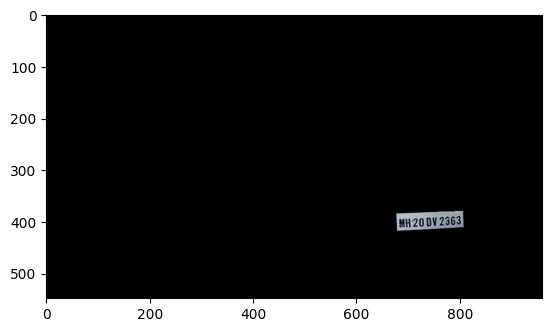

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

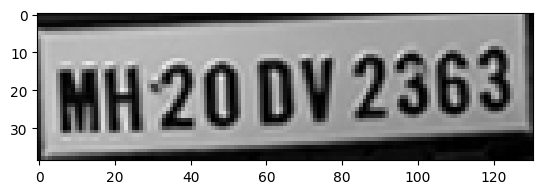

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 4], [131, 4], [131, 37], [0, 37]], 'MH20 DV 2363', 0.5435011630275409)]

The vehicle number is : MH20 DV 2363


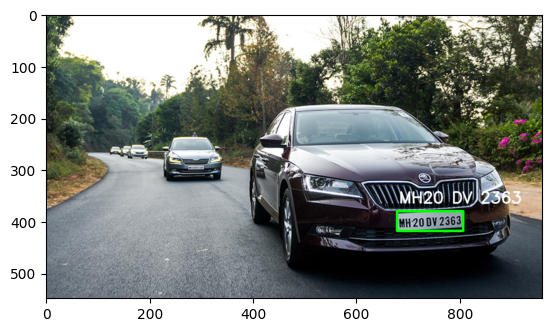

In [12]:
text = result[0][-2]
print(f"The vehicle number is : {text}")
font = cv2.FONT_HERSHEY_SIMPLEX

# Calculate horizontal center of the plate
# Method 1: Using bounding box center with offset
bounding_box_center_x = (approx[0][0][0] + approx[2][0][0]) // 2
text_x = bounding_box_center_x - (len(text) * 5)  # Adjust offset as needed

img_copy = img.copy()  # Create a copy

# Position text above the plate
res = cv2.putText(img_copy, text=text, org=(text_x, approx[1][0][1] - 20),
                 fontFace=font, fontScale=1, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
# Draw rectangle around the plate
res = cv2.rectangle(img_copy, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Display the image
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))